<a href="https://colab.research.google.com/github/NandiniMalik55/data-science-projects/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score
import pickle

pd.set_option('display.max_columns', None )
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/creditcard_2023.csv')
all(data.index == data.id)

True

In [ ]:
data.set_index('id', inplace = True)
print('Shape of our dataset: ', data.shape)
data.sample(3)

Shape of our dataset:  (12882, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2722,-0.236064,-0.557599,1.739070,-2.131112,-0.152073,0.272077,0.226787,-0.038633,-0.676352,0.827192,-0.888359,0.458776,1.941807,0.434742,0.354925,0.335669,0.633642,0.221148,-1.464645,-0.178530,-0.069250,0.380590,-0.114413,0.222018,0.639419,-0.332543,-0.004506,-0.042218,3610.25,0.0
8095,1.201468,-0.515019,0.514559,-0.888670,0.073633,0.124746,0.224350,-0.203791,0.864967,0.535631,-0.428708,-0.476503,2.460828,0.770318,0.239297,2.089488,0.986065,0.072238,0.154788,-0.036472,-0.160993,-0.249897,-0.124047,-0.978645,0.687920,-0.638196,-0.236605,-0.029416,11941.89,0.0
9584,1.026965,-0.366291,0.388756,-0.256751,0.595145,0.990623,0.369346,-0.120224,1.346355,0.528566,-0.184102,-0.273370,1.471417,2.372043,-0.116103,0.861295,0.344372,1.019311,-0.298046,-0.317571,-0.147985,-0.110935,-0.323168,-2.719291,1.192291,-0.462105,-0.242779,-0.133430,23888.33,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12882 entries, 0 to 12881
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      12882 non-null  float64
 1   V2      12882 non-null  float64
 2   V3      12882 non-null  float64
 3   V4      12882 non-null  float64
 4   V5      12882 non-null  float64
 5   V6      12882 non-null  float64
 6   V7      12882 non-null  float64
 7   V8      12882 non-null  float64
 8   V9      12882 non-null  float64
 9   V10     12882 non-null  float64
 10  V11     12882 non-null  float64
 11  V12     12882 non-null  float64
 12  V13     12882 non-null  float64
 13  V14     12882 non-null  float64
 14  V15     12882 non-null  float64
 15  V16     12882 non-null  float64
 16  V17     12882 non-null  float64
 17  V18     12882 non-null  float64
 18  V19     12882 non-null  float64
 19  V20     12882 non-null  float64
 20  V21     12882 non-null  float64
 21  V22     12882 non-null  float64
 22

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12882.000000,12881.000000,12881.000000,12881.000000
mean,0.313738,-0.385419,1.159542,-0.609582,0.280548,0.511391,0.429215,-0.150814,1.262955,0.541524,-0.263798,0.127111,1.051127,1.418115,-0.149357,0.549917,0.630586,0.394363,-0.307681,-0.151597,-0.135791,-0.157601,-0.049715,0.153158,0.117222,-0.001375,-0.200194,-0.099278,11924.052451,0.004347
std,0.614812,0.523624,0.731282,0.676973,0.677438,0.720222,0.485249,0.243084,0.949105,0.642250,0.570061,0.625804,1.185721,0.789177,1.030834,0.534072,0.389543,0.552177,0.721782,0.591088,0.324645,0.552137,0.493755,1.093910,0.693897,1.243923,0.462631,0.622635,6945.999826,0.065795
min,-2.513872,-20.936274,-2.206922,-3.996094,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,-2.041556,-2.995759,-1.964099,-3.434314,-2.107417,-3.609738,-2.017711,-1.975492,-2.153325,-5.214795,-16.789033,-5.775451,-6.262872,-14.452018,-3.674306,-6.810179,-3.733169,-5.273815,-8.923980,50.410000,0.000000
25%,-0.152352,-0.543003,0.698895,-0.955614,0.006605,0.108404,0.244421,-0.192787,0.654282,0.311950,-0.581615,-0.283471,0.229780,0.829874,-0.822011,0.189610,0.415496,0.052985,-0.707392,-0.327618,-0.211353,-0.517590,-0.195766,-0.569541,-0.300412,-0.901577,-0.324878,-0.136333,5910.490000,0.000000
50%,0.065845,-0.362876,1.056698,-0.532463,0.180178,0.391453,0.396122,-0.148367,1.147196,0.450621,-0.199520,-0.121906,1.144968,1.481511,-0.089832,0.485882,0.581187,0.346554,-0.275203,-0.200152,-0.155402,-0.147754,-0.068493,0.165752,0.167716,-0.041142,-0.238687,-0.061598,11760.320000,0.000000
75%,0.961348,-0.166066,1.582187,-0.155718,0.393286,0.757757,0.588533,-0.091570,1.715081,0.656498,0.153009,0.467892,1.932073,1.905991,0.544385,0.844567,0.779635,0.675681,0.160894,-0.020071,-0.094939,0.175981,0.048554,0.842873,0.561069,0.848869,-0.119506,0.072868,17979.350000,0.000000
max,1.695400,2.143626,4.440555,2.360359,41.540257,9.295606,37.922674,2.266451,12.171681,12.954246,2.513573,6.109411,4.554510,12.136127,5.078341,6.971189,6.994124,5.510509,3.143020,6.855674,6.834415,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000


In [ ]:
data['Class'].value_counts()


0.0    12825
1.0       56
Name: Class, dtype: int64

DATA PRE PROCESSING


In [ ]:
#Lets check for missing values
data.isna().sum().sum()

3

In [ ]:
# Lets check for duplicates if any
data.duplicated().any()

False

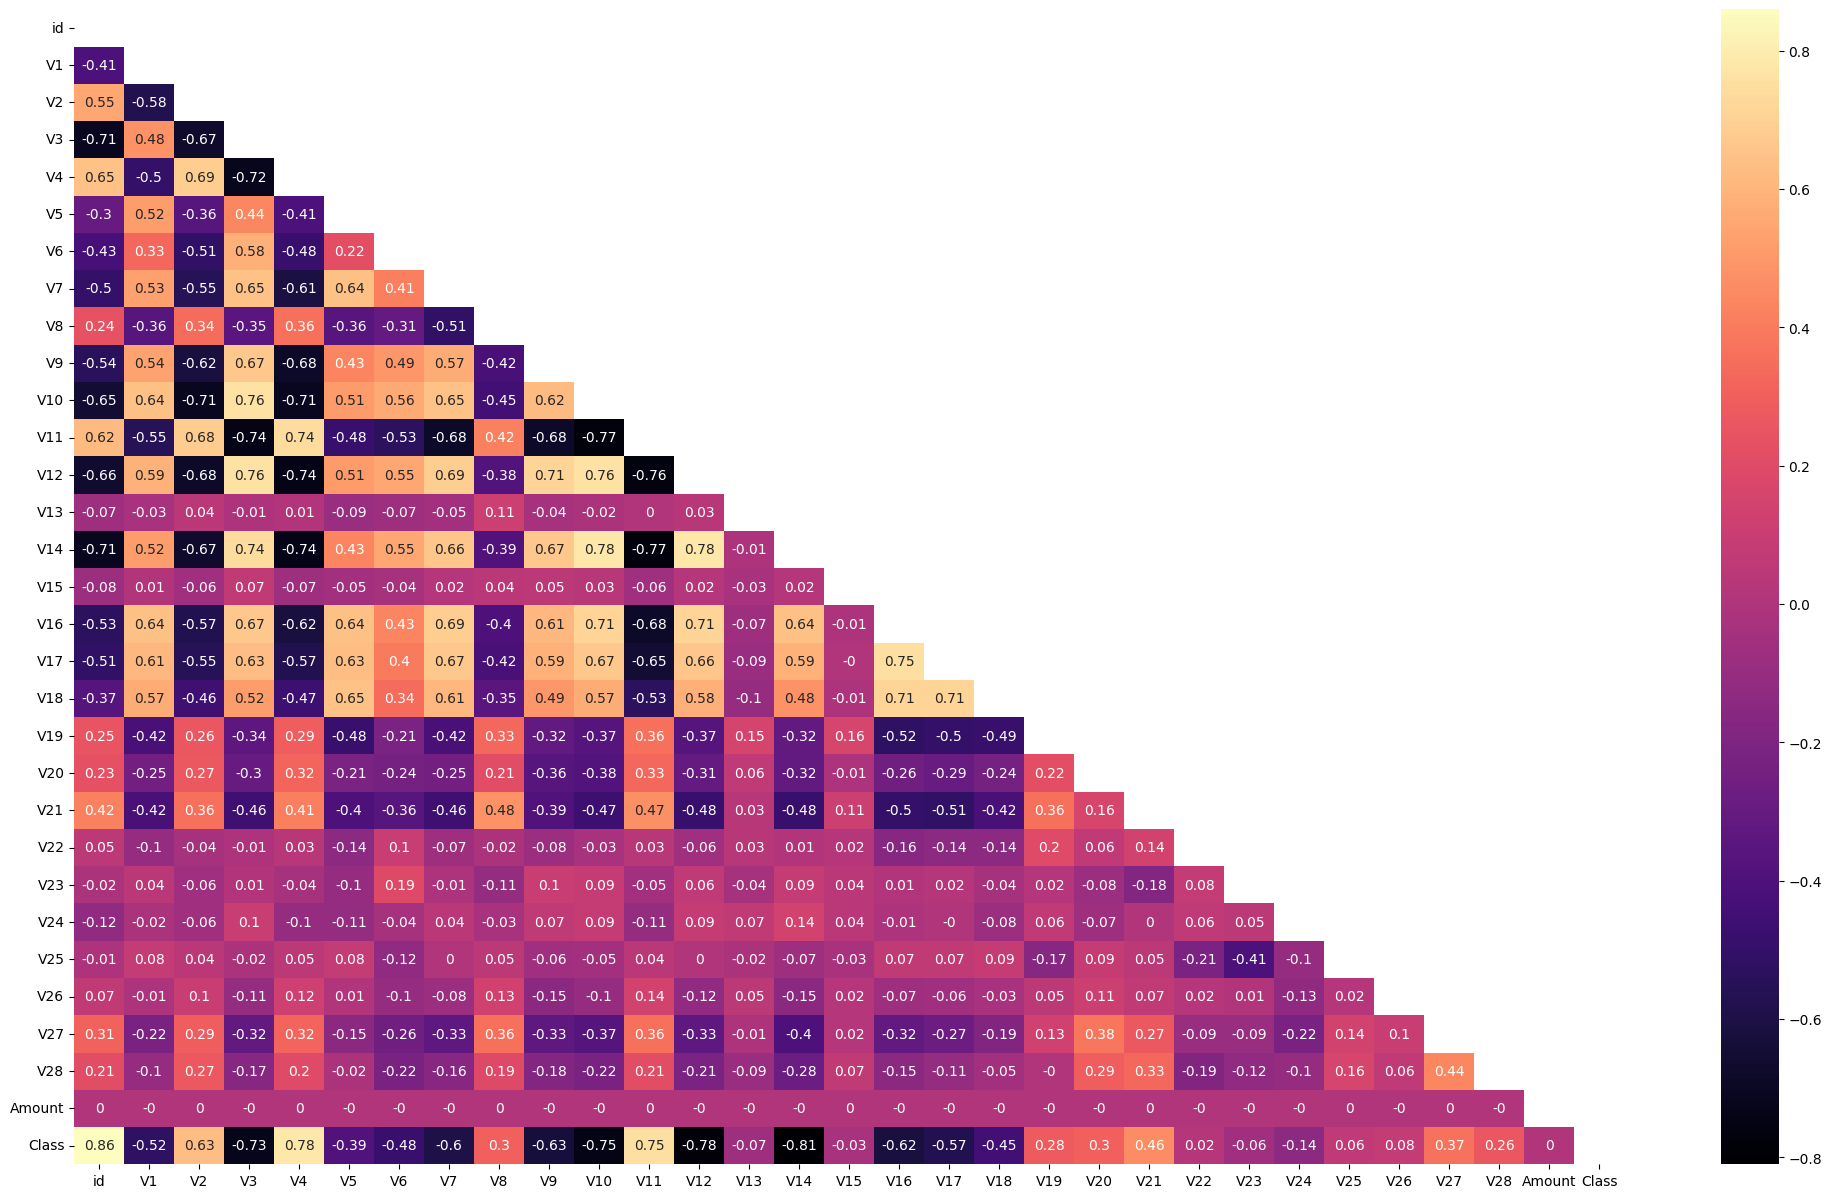

In [ ]:
#Explorartory data analysis
corr_df = data.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=[25,15])
sns.heatmap(corr_df, cmap=sns.color_palette("magma", as_cmap = True), annot=True, mask = mask)
plt.show()

In [ ]:
def generate_corr_mat(df, high = 0.6, low = 0.1):

    corr_mat = {'highly_corr': dict(), 'low_corr': dict()}
    df = df.abs()
    cols = df.columns.tolist()
    for i, val in df.iterrows():
        corr_mat['highly_corr'][i] = [col for col in cols if val[col] > high and col != i]
        corr_mat['low_corr'][i] = [col for col in cols if val[col] < low]
        print(f"Parameters having high co-relation with parameter \033[1m{i}\033[0m is/are: ", corr_mat['highly_corr'][i])
        print(f"Parameters having apprx no co-relation with parameter \033[1m{i}\033[0m is/are: ", corr_mat['low_corr'][i])
        print()
    return corr_mat

correlation_matrix = generate_corr_mat(corr_df)

Parameters having high co-relation with parameter id is/are:  ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'Class']
Parameters having apprx no co-relation with parameter id is/are:  ['V13', 'V15', 'V22', 'V23', 'V25', 'V26', 'Amount']

Parameters having high co-relation with parameter V1 is/are:  ['V10', 'V16', 'V17']
Parameters having apprx no co-relation with parameter V1 is/are:  ['V13', 'V15', 'V23', 'V24', 'V25', 'V26', 'Amount']

Parameters having high co-relation with parameter V2 is/are:  ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'Class']
Parameters having apprx no co-relation with parameter V2 is/are:  ['V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'Amount']

Parameters having high co-relation with parameter V3 is/are:  ['id', 'V2', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']
Parameters having apprx no co-relation with parameter V3 is/are:  ['V13', 'V15', 'V22', 'V23', 'V25', 'Amount']

Parameters having high co-relation with parameter V4 is/are:  ['id', 

In [ ]:
data.skew().sort_values()


V20      -1.556460e+00
V2       -1.397952e+00
V6       -2.016110e-01
V21      -1.089833e-01
V23      -9.968746e-02
V1       -8.341717e-02
V4       -4.416893e-02
V11      -2.089056e-02
V26      -1.895874e-02
V19      -1.017123e-02
id       -6.579536e-16
Class     0.000000e+00
Amount    1.655585e-03
V15       1.123298e-02
V3        1.462221e-02
V13       1.490639e-02
V25       2.300804e-02
V24       6.608974e-02
V12       6.675895e-02
V18       1.291911e-01
V9        1.710575e-01
V14       2.078348e-01
V16       2.664070e-01
V8        2.999722e-01
V22       3.185295e-01
V17       3.730610e-01
V10       7.404136e-01
V5        1.506414e+00
V28       1.724978e+00
V27       2.755452e+00
V7        1.902687e+01
dtype: float64

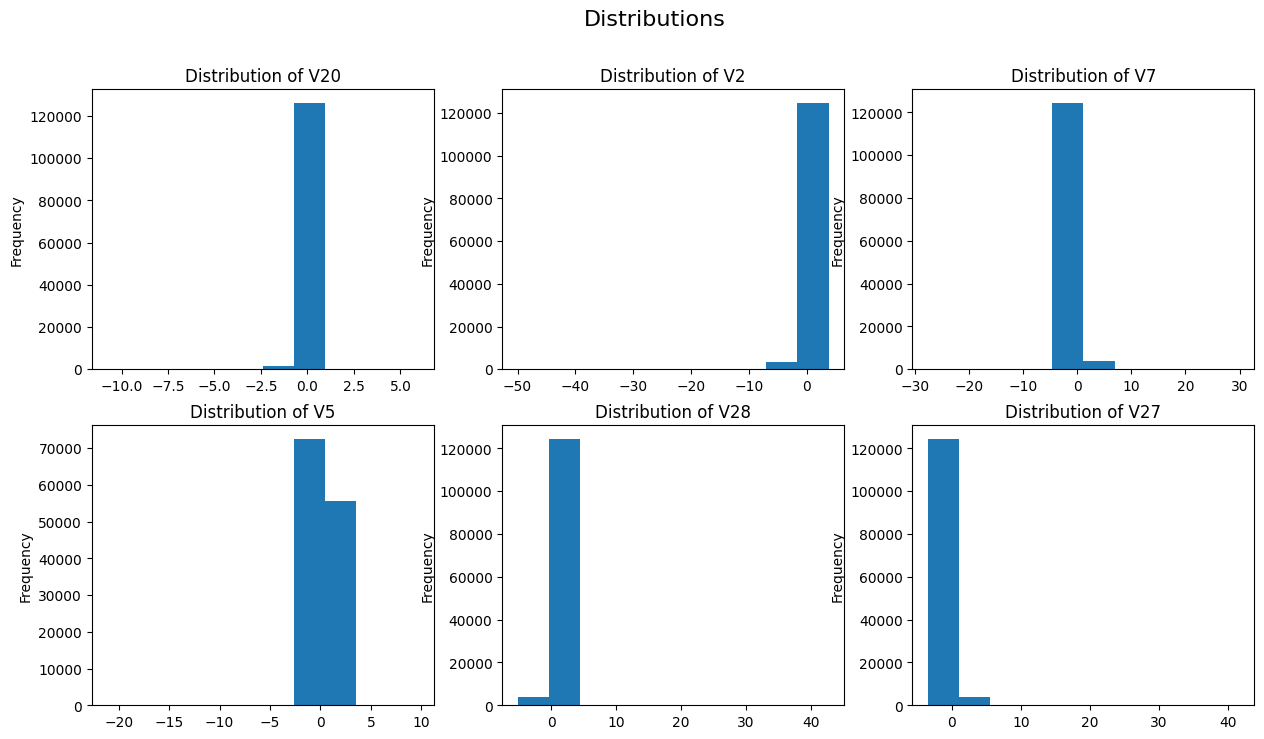

In [ ]:
paper, axes = plt.subplots(2, 3, figsize=(15, 8))
data['V8'].plot(kind='hist', ax=axes[0,0], title='Distribution of V20')
data['V2'].plot(kind='hist', ax=axes[0,1], title='Distribution of V2')
data['V20'].plot(kind='hist', ax=axes[0,2], title='Distribution of V7')
data['V6'].plot(kind='hist', ax=axes[1,0], title='Distribution of V5')
data['V5'].plot(kind='hist', ax=axes[1,1], title='Distribution of V28')
data['V7'].plot(kind='hist', ax=axes[1,2], title='Distribution of V27')

plt.suptitle('Distributions',size=16)
plt.tight_layout
plt.show()

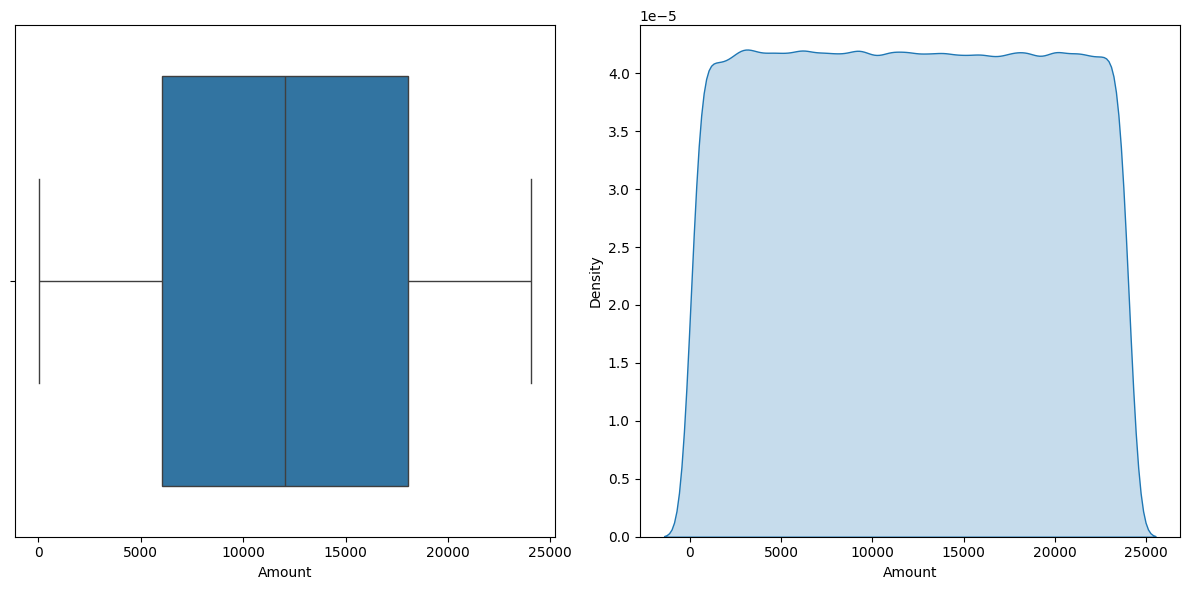

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = [12, 6])
sns.boxplot(data = data, x = 'Amount', ax = axes[0])
sns.kdeplot(data = data['Amount'], shade=True, ax = axes[1])
plt.tight_layout()
plt.show()

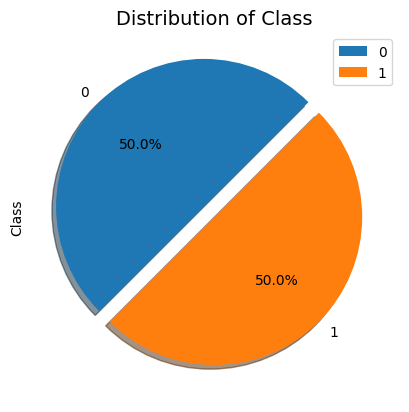

In [ ]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()


In [ ]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
x = data.drop(columns = ['Class'], axis=1)
y = data.Class
x.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [ ]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 30)
Shape of y (568630,)


In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.732048,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,-1.732042,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-1.732036,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-1.732029,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-1.732023,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [ ]:
pca = PCA(n_components = 12)
x_new = pd.DataFrame(pca.fit_transform(x_scaled), columns = ['Col_'+ str(i) for i in range(12)])

x_new.head(3)

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11
0,2.515310,-0.273250,0.896615,0.792737,0.330168,-0.415390,-1.582485,0.942316,-0.843794,-1.185923,0.234625,-0.229670
1,2.405173,0.257598,0.489474,0.081900,-0.183296,1.075459,-0.362490,-0.755241,-0.306906,-0.312809,-0.568318,-0.480112
2,2.600803,-0.606276,0.106083,0.611956,0.792322,0.917844,-1.484187,-1.278587,-1.564881,-1.057915,-1.804166,-0.108720


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_new, y, test_size=0.25, random_state=15, stratify= y)
cv = StratifiedKFold(n_splits = 8, shuffle = True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 12)
(142158, 12)
(426472,)
(142158,)


In [ ]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))

    ## ROC AUC
    prob = model.predict_proba(X_test)
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)


    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")

    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')

    plt.show()

    # Return evaluation metrics
    return model, accuracy, f1, roc_auc

Accuracy:  0.9818652485262876
F1 Score:  0.9818647729248628
AUC(ROC):  0.9818652485262876

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     71079
           1       0.99      0.98      0.98     71079

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158



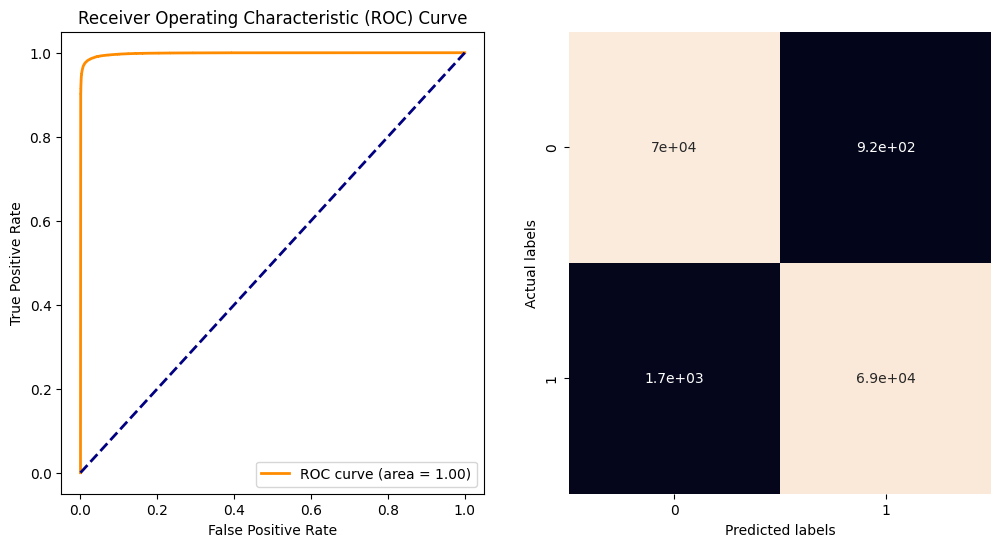

In [ ]:
model_lr = LogisticRegression()
time_start = time.time()
model_lr, acc_lr, f1_lr, roc_auc_lr = train_model(model_lr, x_train, y_train, x_test, y_test)
time_taken_lr = time.time() - time_start


Accuracy:  0.946777529228042
F1 Score:  0.9467436409553823
AUC(ROC):  0.9467775292280419

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     71079
           1       0.97      0.92      0.95     71079

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158



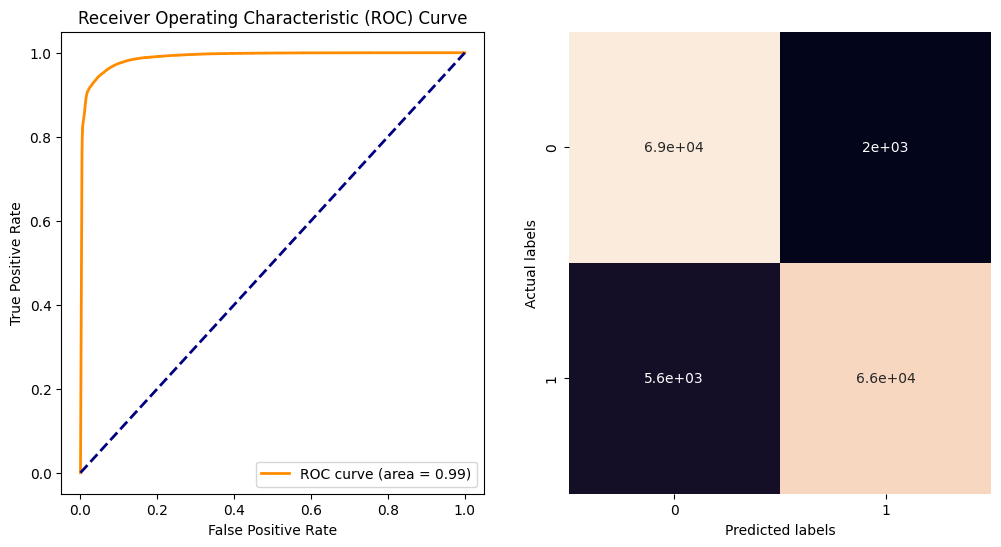

In [ ]:
model_gnb = GaussianNB()
time_start = time.time()
model_gnb, acc_gnb, f1_gnb, roc_auc_gnb = train_model(model_gnb, x_train, y_train, x_test, y_test)
time_taken_gnb = time.time() - time_start

Accuracy:  0.9955612768890952
F1 Score:  0.9955612754480234
AUC(ROC):  0.9955612768890951

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.99      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



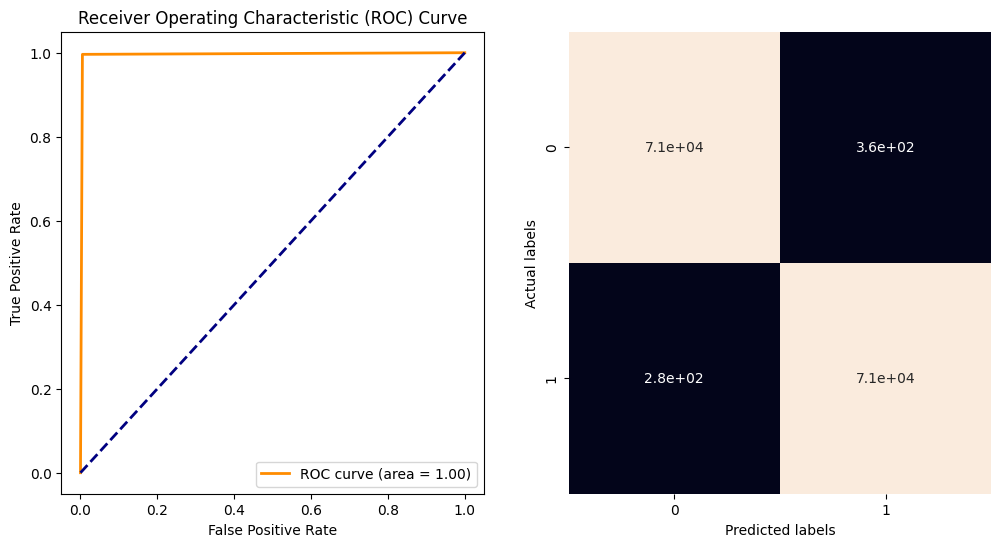

In [ ]:
model_dt = DecisionTreeClassifier()
time_start = time.time()
model_dt, acc_dt, f1_dt, roc_auc_dt = train_model(model_dt, x_train, y_train, x_test, y_test)
time_taken_dt = time.time() - time_start


Accuracy:  0.9988041474978545
F1 Score:  0.9988041474957241
AUC(ROC):  0.9988041474978544

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



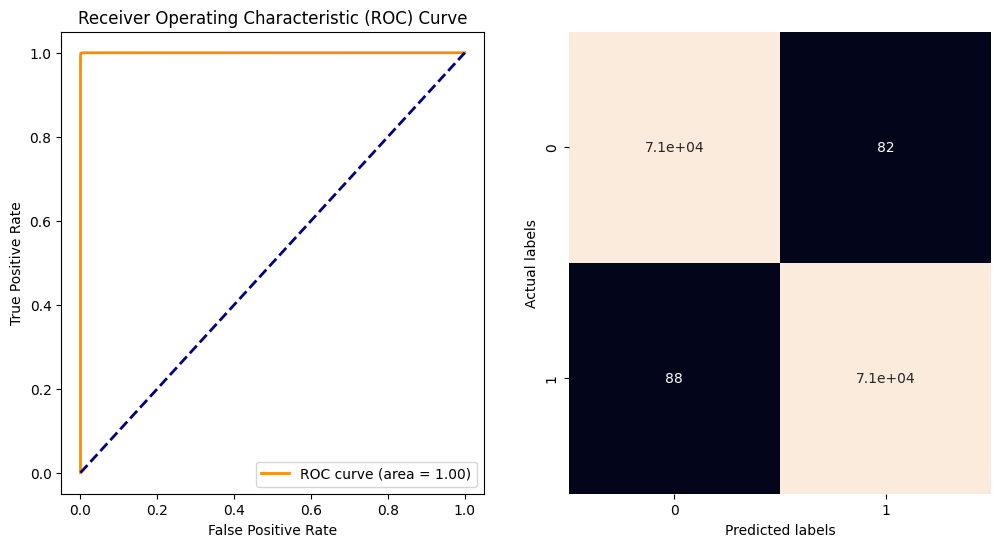

In [ ]:
model_rf = RandomForestClassifier()
time_start = time.time()
model_rf, acc_rf, f1_rf, roc_auc_rf = train_model(model_rf, x_train, y_train, x_test, y_test)
time_taken_rf = time.time() - time_start


In [ ]:
accuracies = [acc_lr, acc_gnb, acc_dt, acc_rf]
f_score = [f1_lr, f1_gnb, f1_dt, f1_rf]
roc_auc = [roc_auc_lr, roc_auc_gnb, roc_auc_dt, roc_auc_rf]
time = [time_taken_lr, time_taken_gnb, time_taken_dt, time_taken_rf,]

final_df = pd.DataFrame({"Accuracies": accuracies, "F1 Scores": f_score, "ROC AUC": roc_auc, "Time Taken": time},
                       index = ['LogisticReg', 'GaussianNB', 'DecisionTree', 'RandomForest'])
final_df = final_df.round(4)
final_df

,Accuracies,F1 Scores,ROC AUC,Time Taken
LogisticReg,0.9819,0.9819,0.9819,4.2820
GaussianNB,0.9468,0.9467,0.9468,1.7892
DecisionTree,0.9956,0.9956,0.9956,20.7190
RandomForest,0.9988,0.9988,0.9988,283.7877
